In [1]:
# Initialize OK
from client.api.notebook import Notebook
ok = Notebook('hw09.ok')

Assignment: Homework 9: Central Limit Theorem
OK, version v1.12.5



# Homework 9: Central Limit Theorem

**Reading**: 
* [Why the mean matters](https://www.inferentialthinking.com/chapters/14/why-the-mean-matters.html)

Please complete this notebook by filling in the cells provided. Before you begin, execute the following cell to load the provided tests. Each time you start your server, you will need to execute this cell again to load the tests.

Homework 9 is due **Thursday, 4/11 at 11:59pm**. You will receive an early submission bonus point if you turn in your final submission by Wednesday, 4/10 at 11:59pm. Start early so that you can come to office hours if you're stuck. Check the website for the office hours schedule. Late work will not be accepted as per the [policies](http://data8.org/sp19/policies.html) of this course. 

Directly sharing answers is not okay, but discussing problems with the course staff or with other students is encouraged. Refer to the policies page to learn more about how to learn cooperatively.

For all problems that you must write our explanations and sentences for, you **must** provide your answer in the designated space. Moreover, throughout this homework and all future ones, please be sure to not re-assign variables throughout the notebook! For example, if you use `max_temperature` in your answer to one question, do not reassign it later on.

In [2]:
# Don't change this cell; just run it. 

import numpy as np
from datascience import *

# These lines do some fancy plotting magic.
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)

from client.api.notebook import Notebook
ok = Notebook('hw09.ok')

Assignment: Homework 9: Central Limit Theorem
OK, version v1.12.5



## 1. The Bootstrap and The Normal Curve


In this exercise, we will explore a dataset that includes the safety inspection scores for restaurants in the city of Austin, Texas.  We will be interested in determining the average restaurant score for the city from a random sample of the scores; the average restaurant score is out of 100. We'll compare two methods for computing a confidence interval for that quantity: the bootstrap resampling method, and an approximation based on the Central Limit Theorem.

In [3]:
# Just run this cell.
pop_restaurants = Table.read_table('restaurant_inspection_scores.csv').drop(5,6)
pop_restaurants

Restaurant Name,Zip Code,Inspection Date,Score,Address
6M Grocery,78652,01/17/2014,90,"805 W FM 1626 RD AUSTIN, TX 78652"
6M Grocery,78652,04/27/2015,93,"805 W FM 1626 RD AUSTIN, TX 78652"
6M Grocery,78652,05/02/2016,88,"805 W FM 1626 RD AUSTIN, TX 78652"
6M Grocery,78652,07/25/2014,100,"805 W FM 1626 RD AUSTIN, TX 78652"
6M Grocery,78652,10/21/2015,87,"805 W FM 1626 RD AUSTIN, TX 78652"
6M Grocery,78652,12/15/2014,93,"805 W FM 1626 RD AUSTIN, TX 78652"
7 Eleven #36575,78660,01/25/2016,92,"15829 N IH 35 SVRD NB AUSTIN, TX 78660"
7 Eleven #36575,78660,03/05/2015,86,"15829 N IH 35 SVRD NB AUSTIN, TX 78660"
7 Eleven #36575,78660,03/14/2014,93,"15829 N IH 35 SVRD NB AUSTIN, TX 78660"
7 Eleven #36575,78660,07/27/2015,97,"15829 N IH 35 SVRD NB AUSTIN, TX 78660"


Run the cell below to plot a histogram of the scores from `pop_restaurants`.

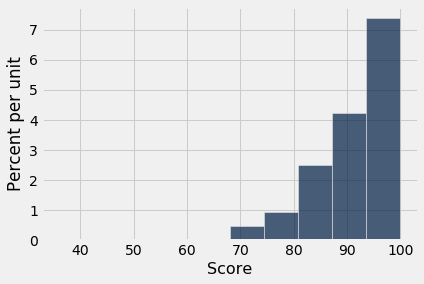

In [5]:
pop_restaurants.hist('Score')

This is the **population mean**:

In [6]:
pop_mean = np.mean(pop_restaurants.column(3))
pop_mean

91.40706693478886

Often it is impossible to find complete datasets like this.  Imagine we instead had access only to a random sample of 100 restaurant inspections, called `restaurant_sample`.  That table is created below. We are interested in using this sample to estimate the population mean.

In [7]:
restaurant_sample = pop_restaurants.sample(100, with_replacement=False)
restaurant_sample

Restaurant Name,Zip Code,Inspection Date,Score,Address
Barton Springs Saloon,78704,10/28/2014,91,"424 S LAMAR BLVD SB AUSTIN, TX 78704 (30.261249, -97.758464)"
Berry Austin,78731,04/09/2015,100,"5523 BALCONES DR Unit A AUSTIN, TX 78731 (30.336637, -97 ..."
Abacus School of Austin,78717,10/29/2015,93,"14115 AVERY RANCH BLVD AUSTIN, TX 78717 (30.494623, -97. ..."
ABC's & 123's Infant and Child Care Cntr,78653,08/20/2015,100,"13419 E US 290 HWY EB MANOR, TX 78653"
Lavaca Street Bar,78701,08/31/2016,90,"405 LAVACA ST AUSTIN, TX 78701 (30.26729, -97.74574)"
Dollar General Store #10948,78744,09/15/2015,93,"5002 NUCKOLS CROSSING RD AUSTIN, TX 78744 (30.195383, -9 ..."
Tinos Greek Cafe,78723,08/06/2014,80,"1201 BARBARA JORDAN BLVD Unit 1230 AUSTIN, TX 78723 (30. ..."
La Michoacana Meat Market,78745,02/09/2016,94,"512 W STASSNEY LN AUSTIN, TX 78745 (30.207855, -97.780106)"
Ridgetop Elementary,78751,11/03/2014,100,"5005 CASWELL AVE AUSTIN, TX 78751 (30.31185, -97.71679)"
Randall's # 2987 Deli,78732,10/06/2015,95,"5145 N FM 620 RD AUSTIN, TX 78732 (30.390368, -97.884685)"


Run the cell below to plot a histogram of the **sample** scores from `restaurant_sample`.

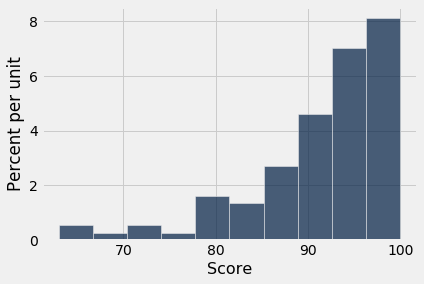

In [8]:
restaurant_sample.hist('Score') 

This is the **sample mean**:

In [9]:
sample_mean = np.mean(restaurant_sample.column(3))
sample_mean

91.44

#### Question 1
Complete the function `one_resampled_mean` below. It should take in an original table `data`, with a column `Score`, and return the mean score of one resampling from `data`. 

Remember to check the output of all running your functions before moving to the autograder test.
<!--
BEGIN QUESTION
name: q1_1
manual: false
-->

In [10]:
def one_resampled_mean(data):
    resampled_data = data.sample(100, with_replacement=False)
    return np.mean(resampled_data.column(3))

# Visualize one call of your function:
this_mean = one_resampled_mean(pop_restaurants)
this_mean

91.44

In [11]:
ok.grade("q1_1");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



#### Question 2
Complete the function `bootstrap_scores` below. It should take no arguments. It should simulate drawing 5000 resamples from `restaurant_sample` and computing the mean restaurant score in each resample.  It should return an array of those 5000 resample means.
<!--
BEGIN QUESTION
name: q1_2
manual: false
-->

In [12]:
def bootstrap_scores():
    resampled_means = make_array()
    for i in range(5000):
        resampled_mean = np.mean(restaurant_sample.sample().column(3))
        resampled_means = np.append(resampled_means, resampled_mean)
    return resampled_means

resampled_means = bootstrap_scores()
resampled_means

array([90.3 , 89.99, 91.1 , ..., 91.49, 92.17, 91.77])

In [13]:
ok.grade("q1_2");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 2
    Failed: 0
[ooooooooook] 100.0% passed



Take a look at the histogram of the **resampled means**.

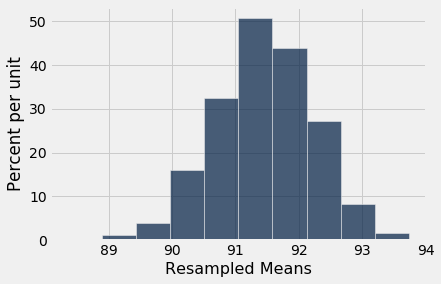

In [14]:
Table().with_column('Resampled Means', resampled_means).hist()

#### Question 3
Compute a 95 percent confidence interval for the average restaurant score using the array `resampled_means`.
<!--
BEGIN QUESTION
name: q1_3
manual: false
-->

In [15]:
lower_bound = percentile(2.5, resampled_means)
upper_bound = percentile(97.5, resampled_means)
print("95% confidence interval for the average restaurant score, computed by bootstrapping:\n(",lower_bound, ",", upper_bound, ")")

95% confidence interval for the average restaurant score, computed by bootstrapping:
( 89.9 , 92.92 )


#### Question 4
Does the distribution of the resampled mean scores look normally distributed? State "yes" or "no" and describe in one sentence why you would expect that result.
<!--
BEGIN QUESTION
name: q1_4
manual: true
-->
<!-- EXPORT TO PDF -->

Yes, the distribution of the resampled mean scores look normally distributed and I expected this result because by the central limit theorem, the distribution of the mean of a large sample drawn randomly with replacement will be roughly normal, regardless of what the distribution of the sample looks like. 

#### Question 5
Does the distribution of the **sampled scores** look normally distributed? State "yes" or "no" and describe in one sentence why you should expect this result.

**Hint:** Remember that we are no longer talking about the resampled means!
<!--
BEGIN QUESTION
name: q1_5
manual: true
-->
<!-- EXPORT TO PDF -->

No because the sampled scores are not a mean or a sum and do not depend on eachother. 

For the last question, you'll need to recall two facts.
1. If a group of numbers has a normal distribution, around 95% of them lie within 2 standard deviations of their mean.
2. The Central Limit Theorem tells us the quantitative relationship between the following:
    * the standard deviation of an array of numbers.
    * the standard deviation of an array of means of samples taken from those numbers.

#### Question 6
Without referencing the array `resampled_means` or performing any new simulations, calculate an interval around the `sample_mean` that covers approximately 95% of the numbers in the `resampled_means` array.  **You may use the following values to compute your result, but you should not perform additional resampling** - think about how you can use the CLT to accomplish this.
<!--
BEGIN QUESTION
name: q1_6
manual: false
-->

In [19]:
sample_mean = np.mean(restaurant_sample.column(3))
sample_sd = np.std(restaurant_sample.column(3))
sample_size = restaurant_sample.num_rows

sd_of_means = sample_sd/(sample_size**(1/2))
lower_bound_normal = sample_mean-sd_of_means*2
upper_bound_normal = sample_mean+sd_of_means*2
print("95% confidence interval for the average restaurant score, computed by a normal approximation:\n(",lower_bound_normal, ",", upper_bound_normal, ")")

95% confidence interval for the average restaurant score, computed by a normal approximation:
( 89.8686769905586 , 93.0113230094414 )


This confidence interval should look very similar to the one you computed in **Question 3**.

## 2. Testing the Central Limit Theorem


The Central Limit Theorem tells us that the probability distribution of the **sum** or **average** of a large random sample drawn with replacement will be roughly normal, *regardless of the distribution of the population from which the sample is drawn*.

That's a pretty big claim, but the theorem doesn't stop there. It further states that the standard deviation of this normal distribution is given by 

$$\frac{\texttt{sd of the original distribution}}{\sqrt{\texttt{sample size}}}$$ 

In other words, suppose we start with *any distribution* that has standard deviation $x$, take a sample of size $n$ (where $n$ is a large number) from that distribution with replacement, and compute the **mean** of that sample. If we repeat this procedure many times, then those sample means will have a normal distribution with standard deviation $\frac{x}{\sqrt{n}}$.

That's an even bigger claim than the first one! The proof of the theorem is beyond the scope of this class, but in this exercise, we will be exploring some data to see the CLT in action.

<div class="hide">\pagebreak</div>

**Question 1.** Define the function `one_statistic_prop_heads` which should return exactly one simulated statistic of the proportion of heads from $n$ coin flips.

<!--
BEGIN QUESTION
name: q2_1
manual: false
-->

In [6]:
coin_proportions = make_array(.5, .5) # our coin is fair

def one_statistic_prop_heads(n):
    simulated_proportions = sample_proportions(n, coin_proportions)
    prop_heads = simulated_proportions.item(0)
    return prop_heads

In [7]:
ok.grade("q2_1");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



<div class="hide">\pagebreak</div>

**Question 2.** The CLT only applies when sample sizes are "sufficiently large." This isn't a very precise statement. Is 10 large?  How about 50?  The truth is that it depends both on the original population distribution and just how "normal" you want the result to look. Let's use a simulation to get a feel for how the distribution of the sample mean changes as sample size goes up.

Consider a coin flip. If we say `Heads` is $1$ and `Tails` is $0$, then there's a 50% chance of getting a 1 and a 50% chance of getting a 0, which definitely doesn't match our definition of a normal distribution.  The average of several coin tosses, where Heads is 1 and Tails is 0, is equal to the proportion of heads in those coin tosses (which is equivalent to the mean value of the coin tosses), so the CLT should hold **true** if we compute the sample proportion of heads many times.

Write a function called `sample_size_n` that takes in a sample size $n$. It should return an array that contains 5000 sample proportions of heads, each from $n$ coin flips.

<!--
BEGIN QUESTION
name: q2_2
manual: false
-->

In [8]:
def sample_size_n(n):
    coin_proportions = make_array(.5, .5) # our coin is fair
    heads_proportions = make_array()
    for i in np.arange(5000):
        prop_heads = one_statistic_prop_heads(n)
        heads_proportions = np.append(heads_proportions, prop_heads)
    return heads_proportions

<div class="hide">\pagebreak</div>
The code below will use the function you just defined to plot the empirical distribution of the sample mean for various sample sizes. Drag the slider or click on the number to the right to type in a sample size of your choice. The x- and y-scales are kept the same to facilitate comparisons. Notice the shape of the graph as the sample size increases and decreases.

In [9]:
# Just run this cell
from ipywidgets import interact

def outer(f):
    def graph(x):
        bins = np.arange(-0.01,1.05,0.02)
        sample_props = f(x)
        Table().with_column('Sample Size: {}'.format(x), sample_props).hist(bins=bins)
        plt.ylim(0, 30)
        print('Sample SD:', np.std(sample_props))
        plt.show()
    return graph
    
interact(outer(sample_size_n), x=(0, 400, 1), continuous_update=False);

# Min sample size is 0, max is 400
# The graph will refresh a few times when you drag the slider around

interactive(children=(IntSlider(value=200, description='x', max=400), Output()), _dom_classes=('widget-interac…

You can see that even the means of samples of 10 items follow a roughly bell-shaped distribution.  A sample of 50 items looks quite bell-shaped.

<div class="hide">\pagebreak</div>

**Question 3:** In the plot for a sample size of 10, why are the bars spaced at intervals of .1, with gaps in between?

<!--
BEGIN QUESTION
name: q2_3
manual: true
-->
<!-- EXPORT TO PDF -->

In the sample size of 10, the intervals are soaced at .1 with gaps in between because there are only ten items and we are finding the mean, which means that we divide the sum by 10. 

<div class="hide">\pagebreak</div>
Now we will test the second claim of the CLT: That the SD of the sample mean is the SD of the original distribution, divided by the square root of the sample size.

We have imported the flight delay data and computed its standard deviation for you.

In [10]:
united = Table.read_table('united_summer2015.csv')
united_std = np.std(united.column('Delay'))
united_std

39.480199851609314

<div class="hide">\pagebreak</div>

**Question 4:** Write a function called `empirical_sample_mean_sd` that takes a sample size `n` as its argument. The function should simulate 500 samples with replacement of size `n` from the flight delays dataset, and it should return the standard deviation of the **means of those 500 samples**.

*Hint:* This function will be similar to the `sample_size_n` function you wrote earlier.

<!--
BEGIN QUESTION
name: q2_4
manual: false
-->

In [11]:
def empirical_sample_mean_sd(n):
    sample_means = make_array()
    for i in np.arange(500):
        sample = united.sample(n, with_replacement=True)
        sample_mean = np.mean(sample.column("Delay"))
        sample_means = np.append(sample_means, sample_mean)
    return np.std(sample_means)

empirical_sample_mean_sd(10)

12.040942062812196

In [28]:
ok.grade("q2_4");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



**Question 5:** Now, write a function called `predict_sample_mean_sd` to find the predicted value of the standard deviation of means according to the relationship between the standard deviation of the sample mean and sample size that is discussed [here](https://www.inferentialthinking.com/chapters/14/5/variability-of-the-sample-mean.html) in the textbook. It takes a sample size `n` (a number) as its argument.  It returns the predicted value of the standard deviation of the mean delay time for samples of size `n` from the flight delays (represented in the table `united`).

<!--
BEGIN QUESTION
name: q2_5
manual: false
-->

In [39]:
def predict_sample_mean_sd(n):
    return united_std/(n**.5)

predict_sample_mean_sd(10)

12.484735400972708

In [40]:
ok.grade("q2_5");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



<div class="hide">\pagebreak</div>
The cell below will plot the predicted and empirical SDs for the delay data for various sample sizes.

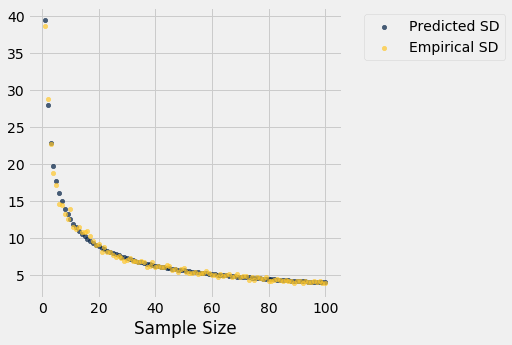

In [41]:
sd_table = Table().with_column('Sample Size', np.arange(1,101))
predicted = sd_table.apply(predict_sample_mean_sd, 'Sample Size')
empirical = sd_table.apply(empirical_sample_mean_sd, 'Sample Size')
sd_table = sd_table.with_columns('Predicted SD', predicted, 'Empirical SD', empirical)
sd_table.scatter('Sample Size')

<div class="hide">\pagebreak</div>

**Question 6:** Do our predicted and empirical values match? Why is this the case?

**Hint:** Are there any laws that we learned about in class that might help explain this?

<!--
BEGIN QUESTION
name: q2_6
manual: true
-->
<!-- EXPORT TO PDF -->

Our predicted and empirical values get closer and closer as we use a larger sample size. The law that we learned that explains this would be the central limit theorem because the CLT states that when we draw a large population, the standard deviation of the means can be predicted by the standard deviation of the sample divided by the square root of the sample size. 

## 3. Polling and the Normal Distribution


#### Question 1

Michelle is a statistical consultant, and she works for a group that supports Proposition 68 (which would mandate labeling of all horizontal or vertical axes), called Yes on 68.  They want to know how many Californians will vote for the proposition.

Michelle polls a uniform random sample of all California voters, and she finds that 210 of the 400 sampled voters will vote in favor of the proposition. Fill in the code below to form a table with 3 columns: the first two columns should be identical to `sample`. The third column should be named `Proportion` and have the proportion of total voters that chose each option.

<!--
BEGIN QUESTION
name: q3_1
manual: false
-->

In [12]:
sample = Table().with_columns(
    "Vote",  make_array("Yes", "No"),
    "Count", make_array(210,   190))
sample_size = 400
sample_with_proportions = sample.with_columns('Proportion', make_array(210/400, 190/400))
sample_with_proportions

Vote,Count,Proportion
Yes,210,0.525
No,190,0.475


In [13]:
ok.grade("q3_1");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



#### Question 2

She then wants to use 10,000 bootstrap resamples to compute a confidence interval for the proportion of all California voters who will vote Yes.  Fill in the next cell to simulate an  empirical distribution of Yes proportions with 10,000 resamples. In other words, use bootstrap resampling to simulate 10,000 election outcomes, and populate `resample_yes_proportions` with the yes proportion of each bootstrap resample. Then, visualize `resample_yes_proportions` with a histogram. You should see a bell shaped curve centered near the proportion of Yes in the original sample.

<!--
BEGIN QUESTION
name: q3_2
manual: false
-->

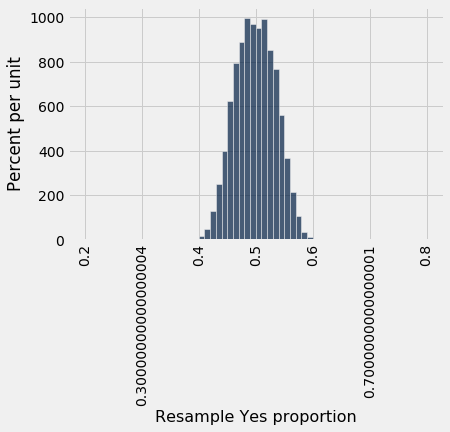

In [14]:
resample_yes_proportions = make_array()
for i in np.arange(10000):
    resample = sample_proportions(400, sample_with_proportions.column(2))
    resample_yes_proportions = np.append(resample_yes_proportions, resample)
Table().with_column("Resample Yes proportion", resample_yes_proportions).hist(bins=np.arange(.2, .8, .01))

In [15]:
ok.grade("q3_2");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



#### Question 3
Why does the Central Limit Theorem (CLT) apply in this situation, and how does it explain the distribution we see above?

<!--
BEGIN QUESTION
name: q3_3
manual: true
-->
<!-- EXPORT TO PDF -->

The CLT applies in this situation because the proportion of voters that say yes is essentially the average of the sample that has said yes. It explains the distribution because we are bootstrapping the average over and over which will produce a bell curve.

<div class="hide">\pagebreak</div>
In a population whose members are 0 and 1, there is a simple formula for the standard deviation of that population:

$$\texttt{standard deviation} = \sqrt{(\text{proportion of 0s}) \times (\text{proportion of 1s})}$$

(Figuring out this formula, starting from the definition of the standard deviation, is an fun exercise for those who enjoy algebra.)

#### Question 4
Using only the CLT and the numbers of Yes and No voters in our sample of 400, compute (_algebraically_) a number `approximate_sd` that's the predicted standard deviation of the array `resample_yes_proportions` according to the Central Limit Theorem. **Do not access the data in `resample_yes_proportions` in any way.** Remember that a predicted standard deviation of the sample means can be computed from the population SD and the size of the sample. 

Also remember that if we do not know the population SD, we can use the sample SD as a reasonable approximation in its place.

<!--
BEGIN QUESTION
name: q3_4
manual: false
-->

In [25]:
approximate_sd = (sample_with_proportions.column(2).item(1)*sample_with_proportions.column(2).item(0))**.5/(400)**.5
approximate_sd

0.024968730444297725

In [26]:
ok.grade("q3_4");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



#### Question 5

Compute the SD of the array `resample_yes_proportions` which will act as an approximation to the true SD of the possible sample proportions. This will help verify whether your answer to question 2 is approximately correct. 

<!--
BEGIN QUESTION
name: q3_5
manual: false
-->

In [27]:
exact_sd = np.std(resample_yes_proportions)
exact_sd

0.035298353361028045

In [28]:
ok.grade("q3_5");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



#### Question 6
**Again, without accessing `resample_yes_proportions` in any way**, compute an approximate 95% confidence interval for the proportion of Yes voters in California.

The cell below draws your interval as a red bar below the histogram of `resample_yes_proportions`; use that to verify that your answer looks right.

*Hint:* How many SDs corresponds to 95% of the distribution promised by the CLT? Recall the discussion in the textbook <a href = "https://www.inferentialthinking.com/chapters/14/3/sd-and-the-normal-curve.html"> here. </a>

<!--
BEGIN QUESTION
name: q3_6
manual: false
-->

In [29]:
lower_limit = .525-approximate_sd*2
upper_limit = .525+approximate_sd*2
print('lower:', lower_limit, 'upper:', upper_limit)

lower: 0.47506253911140456 upper: 0.5749374608885954


In [30]:
ok.grade("q3_6");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



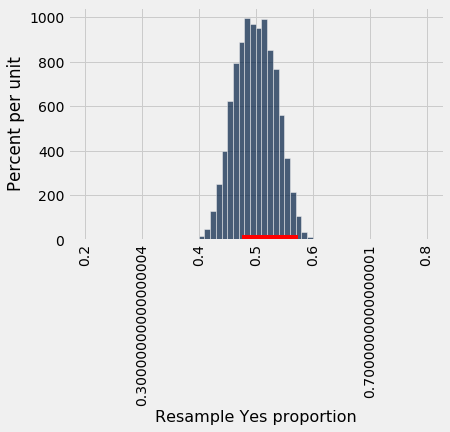

In [31]:
# Run this cell to plot your confidence interval.
Table().with_column("Resample Yes proportion", resample_yes_proportions).hist(bins=np.arange(.2, .8, .01))
plt.plot(make_array(lower_limit, upper_limit), make_array(0, 0), c='r', lw=10);

<div class="hide">\pagebreak</div>
Your confidence interval should overlap the number 0.5.  That means we can't be very sure whether Proposition 68 is winning, even though the sample Yes proportion is a bit above 0.5.

The Yes on 68 campaign really needs to know whether they're winning.  It's impossible to be absolutely sure without polling the whole population, but they'd be okay if the standard deviation of the sample mean were only 0.005.  They ask Michelle to run a new poll with a sample size that's large enough to achieve that.  (Polling is expensive, so the sample also shouldn't be bigger than necessary.)

Michelle consults Chapter 14 of your textbook.  Instead of making the conservative assumption that the population standard deviation is 0.5 (coding Yes voters as 1 and No voters as 0), she decides to assume that it's equal to the standard deviation of the sample,

$$\sqrt{(\text{Yes proportion in the sample}) \times (\text{No proportion in the sample})}.$$

Under that assumption, Michelle decides that a sample of 9,975 would suffice.

#### Question 7
Does Michelle's sample size achieve the desired standard deviation of sample means? What SD would you achieve with a smaller sample size? A higher sample size? To explore this, first compute the SD of sample means obtained by using Michelle's sample size.

<!--
BEGIN QUESTION
name: q3_7
manual: false
-->

In [44]:
estimated_population_sd = approximate_sd
michelle_sample_size = 9975
michelle_sample_mean_sd =((sample_with_proportions.column(2).item(1)*sample_with_proportions.column(2).item(0))**.5)/(9975**.5)
print("With Michelle's sample size, you would predict a sample mean SD of %f." % michelle_sample_mean_sd)

With Michelle's sample size, you would predict a sample mean SD of 0.005000.


In [45]:
ok.grade("q3_7");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed




**Question 8**

Then, compute the SD of sample means that you would get from a smaller sample size. Ideally, you should pick a number that is significantly smaller, but any sample size smaller than Michelle's will do. 


<!--
BEGIN QUESTION
name: q3_8
manual: false
-->

In [46]:
smaller_sample_size = 200
smaller_sample_mean_sd =((sample_with_proportions.column(2).item(1)*sample_with_proportions.column(2).item(0))**.5)/(200**.5)
print("With this smaller sample size, you would predict a sample mean SD of %f" % smaller_sample_mean_sd)

With this smaller sample size, you would predict a sample mean SD of 0.035311


In [47]:
ok.grade("q3_8");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



**Question 9**

Finally, compute the SD of sample means that you would get from a larger sample size. Here, a number that is significantly larger would make any difference more obvious, but any sample size larger than Michelle's will do. 


<!--
BEGIN QUESTION
name: q3_9
manual: false
-->

In [48]:
larger_sample_size = 15000
larger_sample_mean_sd = ((sample_with_proportions.column(2).item(1)*sample_with_proportions.column(2).item(0))**.5)/(15000**.5)
print("With this larger sample size, you would predict a sample mean SD of %f" % larger_sample_mean_sd)

With this larger sample size, you would predict a sample mean SD of 0.004077


In [43]:
ok.grade("q3_9");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



#### Question 10
Based off of this, was Michelle's sample size approximately the minimum sufficient sample, given her assumption that the sample SD is the same as the population SD? Assign `min_sufficient` to `True` if this 9975 was indeed approximately the minimum sufficient sample, and `False` if it wasn't.

<!--
BEGIN QUESTION
name: q3_10
manual: false
-->

In [49]:
min_sufficient = True
min_sufficient

True

In [50]:
ok.grade("q3_10");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



## 4. Submission


Once you're finished, select "Save and Checkpoint" in the File menu and then execute the `submit` cell below. The result will contain a link that you can use to check that your assignment has been submitted successfully. If you submit more than once before the deadline, we will only grade your final submission. If you mistakenly submit the wrong one, you can head to [okpy.org](https://okpy.org/) and flag the correct version. To do so, go to the website, click on this assignment, and find the version you would like to have graded. There should be an option to flag that submission for grading!

In [51]:
_ = ok.submit()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving notebook... Saved 'hw09.ipynb'.
Submit... 100% complete
Submission successful for user: mingxiuhui@berkeley.edu
URL: https://okpy.org/cal/data8/sp19/hw09/submissions/gZXlYZ



In [ ]:
# For your convenience, you can run this cell to run all the tests at once!
import os
print("Running all tests...")
_ = [ok.grade(q[:-3]) for q in os.listdir("tests") if q.startswith('q') and len(q) <= 10]
print("Finished running all tests.")